In [318]:
import requests
import json
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import ast


# Extracción de los Datos
### Fórmula para transformar fecha estandar a unix

In [319]:

def to_unix(date_str):
    try:
        date_object = datetime.datetime.strptime(date_str, '%d/%m/%Y')
        timestamp = int(date_object.timestamp())
        return timestamp
    except ValueError:
        return None

to_unix('13/08/2023')

1691895600

### GET/global
Get cryptocurrency global data  
  
A partir de la consulta de esta API, vamos a determinar parte de las criptomonedas con los que vamos a trabajar. De aqué obtendremos las 9 criptomonedas con mayor porcentaje de mercado.

In [320]:
glob = requests.get("https://api.coingecko.com/api/v3/global").text
glob = json.loads(glob)


In [321]:
glob['data'].keys()

dict_keys(['active_cryptocurrencies', 'upcoming_icos', 'ongoing_icos', 'ended_icos', 'markets', 'total_market_cap', 'total_volume', 'market_cap_percentage', 'market_cap_change_percentage_24h_usd', 'updated_at'])

Como vemos, la data viene en un jason con varios diccionarios anidados. Solo accederemos a la información de "Market_cap_percentage" para encontrar las 9 criptomonedas con mayor porcentaje.

In [322]:
globm = pd.DataFrame(glob['data']['market_cap_percentage'].items(),columns=['Símbolo','Market_percent'])
globm.sort_values(by='Market_percent',ascending=False,inplace=True)
globmc=globm
globmc = globmc.drop('Market_percent',axis=1).head(9)
globmc['Criterio'] = 'Mercado'
globmc


,Símbolo,Criterio
0,btc,Mercado
1,eth,Mercado
2,usdt,Mercado
3,bnb,Mercado
4,xrp,Mercado
5,usdc,Mercado
6,steth,Mercado
7,doge,Mercado
8,ada,Mercado


### GET/SEARCHING/TRENDING
Top-7 trending coins on CoinGecko as searched by users in the last 24 hours (Ordered by most popular first).

In [323]:
Trending = requests.get("https://api.coingecko.com/api/v3/search/trending").text

Trending = json.loads(Trending)

In [324]:
Trending

{'coins': [{'item': {'id': 'apecoin',
    'coin_id': 24383,
    'name': 'ApeCoin',
    'symbol': 'APE',
    'market_cap_rank': 62,
    'thumb': 'https://assets.coingecko.com/coins/images/24383/thumb/apecoin.jpg?1647476455',
    'small': 'https://assets.coingecko.com/coins/images/24383/small/apecoin.jpg?1647476455',
    'large': 'https://assets.coingecko.com/coins/images/24383/large/apecoin.jpg?1647476455',
    'slug': 'apecoin',
    'price_btc': 6.33269018902654e-05,
    'score': 0}},
  {'item': {'id': 'sei-network',
    'coin_id': 28205,
    'name': 'Sei',
    'symbol': 'SEI',
    'market_cap_rank': 116,
    'thumb': 'https://assets.coingecko.com/coins/images/28205/thumb/TKmaTqMv_400x400.jpeg?1668395911',
    'small': 'https://assets.coingecko.com/coins/images/28205/small/TKmaTqMv_400x400.jpeg?1668395911',
    'large': 'https://assets.coingecko.com/coins/images/28205/large/TKmaTqMv_400x400.jpeg?1668395911',
    'slug': 'sei',
    'price_btc': 5.801657788499452e-06,
    'score': 1}},
 

In [325]:
coin_id = [coin['item']['id'] for coin in Trending['coins']]

# Mostrar los símbolos
print(coin_id)

['apecoin', 'sei-network', 'cyberconnect', 'unibot', 'clearpool', 'sui', 'harrypotterobamasonic10in', 'worldcoin-wld']


In [326]:
dft =pd.DataFrame(coin_id,columns = ['Id'])
dft['Criterio'] = 'Tendencia'
dft

,Id,Criterio
0,apecoin,Tendencia
1,sei-network,Tendencia
2,cyberconnect,Tendencia
3,unibot,Tendencia
4,clearpool,Tendencia
5,sui,Tendencia
6,harrypotterobamasonic10in,Tendencia
7,worldcoin-wld,Tendencia


Además de trabajar con las criptomonedas con mayor mercado, analizaremos también aquellas que son consideradas como "trending" por coingreko. Suelen ser criptomonedas que están teniendo mucha actividad en redes sociales, noticial, que tienen crecimiento de precios, etc.  
Son 7 las criptomonedas trending, sumadas a las 10 de más mercad. Por lo tanto vamos a trabajar en principio con 17 criptomonedas

### GET/COIN/LIST

In [327]:
Coin_list = requests.get("https://api.coingecko.com/api/v3/coins/list?include_platform=false").text
Coin_list = json.loads(Coin_list)

In [328]:
Lista_criptos = pd.DataFrame(Coin_list)

In [329]:
aux = pd.merge(globmc,Lista_criptos,left_on = 'Símbolo' , right_on ='symbol', how='left')
aux.drop(['name','symbol','Símbolo'],axis=1,inplace=True)

aux

,Criterio,id
0,Mercado,bitcoin
1,Mercado,ethereum
2,Mercado,ethereum-wormhole
3,Mercado,bridged-tether-linea
4,Mercado,bridged-tether-stargate
5,Mercado,tether
6,Mercado,tether-pulsechain
7,Mercado,binancecoin
8,Mercado,binance-coin-wormhole
9,Mercado,heco-peg-bnb


In [330]:
considerar = ['bitcoin',  'ethereum', 'tether', 'binancecoin', 'ripple', 'usd-coin', 'dogecoin', 'cardano', 'solana', 'staked-ether']
aux = aux[aux['id'].isin(considerar)]
nuevoorden=['id','Criterio']
aux = aux[nuevoorden]
aux.rename(columns={'id': 'Id'}, inplace=True)

In [331]:
criptos_definitivas = pd.concat([aux,dft],  ignore_index=True)
criptos_definitivas

,Id,Criterio
0,bitcoin,Mercado
1,ethereum,Mercado
2,tether,Mercado
3,binancecoin,Mercado
4,ripple,Mercado
5,usd-coin,Mercado
6,staked-ether,Mercado
7,dogecoin,Mercado
8,cardano,Mercado
9,apecoin,Tendencia


In [332]:
criptos_definitivas.to_csv('Archivos/Criptos.csv',index=False)

### GET/EXCHANGES
List all exchanges  
Detalle de exchanges, con volumenes y rankings de confianza.  
Por ahora no lo utiliazaremos

In [333]:
Exchanges = requests.get("https://api.coingecko.com/api/v3/exchanges?per_page=1000&page=1").text
Exchanges = json.loads(Exchanges)

In [334]:
Exchanges = pd.DataFrame(Exchanges)
Exchanges.head(3)

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,False,10.0,1.0,236405.133118,122963.623147
1,gdax,Coinbase Exchange,2012.0,United States,,https://coinbase-consumer.sjv.io/coingecko,https://assets.coingecko.com/markets/images/23...,False,10.0,2.0,26026.859476,26026.859476
2,bybit_spot,Bybit,2018.0,British Virgin Islands,Bybit is a cryptocurrency exchange that offers...,https://www.bybit.com,https://assets.coingecko.com/markets/images/69...,False,10.0,3.0,21497.644317,21497.644317


### COINS/{ID}/MARKET_CHART/RANGE
Response body
Download
{
  "prices": [],
  "market_caps": [],
  "total_volumes": []
}  

Se accede con el coinid

Desde este endpoint, descargaremos la información histórica para las criptomonedas que definimos en el punto anterior.

In [338]:
listacripto = list(criptos_definitivas['Id'])

In [339]:
hoy = datetime.date.today()
ayer= hoy - datetime.timedelta(days=1)
ayer

datetime.date(2023, 8, 14)

In [340]:
ayer_unix = to_unix(ayer.strftime("%d/%m/%Y"))
print(ayer_unix)

1691982000


Extraeremos la información con un for a partir de la lista con las criptomonedas que incluiremos en el análisis. Esto nos generará un archivo json, que tendrá varios diccionarios anidades y que irémos extrayendo en varios pasos.

In [341]:
dict ={}
for i in listacripto:
    https = 'https://api.coingecko.com/api/v3/coins/'+i+'/market_chart/range?vs_currency=usd&from=1420081200&to='+str(ayer_unix)
    aux = requests.get(https).text
    aux = json.loads(aux)
    dict[i] = aux

In [342]:
dict.keys()

dict_keys(['bitcoin', 'ethereum', 'tether', 'binancecoin', 'ripple', 'usd-coin', 'staked-ether', 'dogecoin', 'cardano', 'apecoin', 'sei-network', 'cyberconnect', 'unibot', 'clearpool', 'sui', 'harrypotterobamasonic10in', 'worldcoin-wld'])

In [343]:
dict['ethereum'].keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [344]:
dict

{'bitcoin': {'prices': [[1420156800000, 314.446],
   [1420243200000, 286.572],
   [1420329600000, 260.936],
   [1420416000000, 273.22],
   [1420502400000, 285.3738000000001],
   [1420588800000, 295.8725],
   [1420675200000, 284.4525],
   [1420761600000, 289.5738000000001],
   [1420848000000, 274.533],
   [1420934400000, 267.184],
   [1421020800000, 268.353667700943],
   [1421107200000, 221.436],
   [1421193600000, 172.1479],
   [1421280000000, 210.5559],
   [1421366400000, 205.816],
   [1421452800000, 199.4914],
   [1421539200000, 208.9892],
   [1421625600000, 214.545],
   [1421712000000, 210.5137],
   [1421798400000, 224.0451],
   [1421884800000, 232.0423000000001],
   [1421971200000, 232.898],
   [1422057600000, 248.096],
   [1422144000000, 253.8388999999999],
   [1422230400000, 271.2882000000001],
   [1422316800000, 259.2356],
   [1422489600000, 232.5329422304941],
   [1422576000000, 228.6354],
   [1422662400000, 218.0233],
   [1422748800000, 226.2697],
   [1422835200000, 240.0193],

Como vemos por la exploración en las últimas 3 líneas de código, la información se encuentra con diccionarios anidados.  
Lo que haremos será ir recorriendo los distintos niveles y extrayendo dataframes que iremos almacenándo en un diccionario dict2.  
A quí lo que estamos haciendo es recorrer cada clave i (las 17 criptomonedas) y luego recorriendo cada dc(diccionarios dentro de cada criptomoneda con las claves prices,markets_caps y total_ volumnes).  
Este ciclo for nos generará 17x3 dataframes con distintas columnas. Todos con Cripto, Fecha y alguna de las 3 claves anteriores.

In [345]:
#i es cada cripto
#dc.keys es prices, 'prices', 'market_caps', 'total_volumes'
dict2 = {}
for i,dc in dict.items():
    for keys in dc.keys():
        df= pd.DataFrame(dc[keys],columns=['Fecha_unix',keys])
        df['Cripto'] = i
        aux =str(i)+str(keys)
        dict2[aux] = df



In [346]:
dict2

{'bitcoinprices':          Fecha_unix        prices   Cripto
 0     1420156800000    314.446000  bitcoin
 1     1420243200000    286.572000  bitcoin
 2     1420329600000    260.936000  bitcoin
 3     1420416000000    273.220000  bitcoin
 4     1420502400000    285.373800  bitcoin
 ...             ...           ...      ...
 3141  1691625600000  29585.488077  bitcoin
 3142  1691712000000  29423.818916  bitcoin
 3143  1691798400000  29396.847971  bitcoin
 3144  1691884800000  29412.142275  bitcoin
 3145  1691971200000  29284.969714  bitcoin
 
 [3146 rows x 3 columns],
 'bitcoinmarket_caps':          Fecha_unix   market_caps   Cripto
 0     1420156800000  4.301448e+09  bitcoin
 1     1420243200000  3.921358e+09  bitcoin
 2     1420329600000  3.571640e+09  bitcoin
 3     1420416000000  3.740880e+09  bitcoin
 4     1420502400000  3.908408e+09  bitcoin
 ...             ...           ...      ...
 3140  1691625600000  5.755354e+11  bitcoin
 3141  1691712000000  5.724142e+11  bitcoin
 3142  16

In [347]:
listaaux = list(dict2.keys())
listaaux 

['bitcoinprices',
 'bitcoinmarket_caps',
 'bitcointotal_volumes',
 'ethereumprices',
 'ethereummarket_caps',
 'ethereumtotal_volumes',
 'tetherprices',
 'tethermarket_caps',
 'tethertotal_volumes',
 'binancecoinprices',
 'binancecoinmarket_caps',
 'binancecointotal_volumes',
 'rippleprices',
 'ripplemarket_caps',
 'rippletotal_volumes',
 'usd-coinprices',
 'usd-coinmarket_caps',
 'usd-cointotal_volumes',
 'staked-etherprices',
 'staked-ethermarket_caps',
 'staked-ethertotal_volumes',
 'dogecoinprices',
 'dogecoinmarket_caps',
 'dogecointotal_volumes',
 'cardanoprices',
 'cardanomarket_caps',
 'cardanototal_volumes',
 'apecoinprices',
 'apecoinmarket_caps',
 'apecointotal_volumes',
 'sei-networkprices',
 'sei-networkmarket_caps',
 'sei-networktotal_volumes',
 'cyberconnectprices',
 'cyberconnectmarket_caps',
 'cyberconnecttotal_volumes',
 'unibotprices',
 'unibotmarket_caps',
 'unibottotal_volumes',
 'clearpoolprices',
 'clearpoolmarket_caps',
 'clearpooltotal_volumes',
 'suiprices',
 '

Lo que haremos para juntar los 51 dataframes en uno solo, será primero generar el primer dataframe al que le agregaremos todas las columnas, y luego iremos concatenando debajo los otros dataframes con otro ciclo for.

In [348]:
dfhist = dict2[listaaux[0]]
listaaux.pop(0)

'bitcoinprices'

In [349]:
dfhist['market_caps'] = float('nan')
dfhist['total_volumes'] = float('nan')
dfhist

,Fecha_unix,prices,Cripto,market_caps,total_volumes
0,1420156800000,314.446000,bitcoin,NaN,NaN
1,1420243200000,286.572000,bitcoin,NaN,NaN
2,1420329600000,260.936000,bitcoin,NaN,NaN
3,1420416000000,273.220000,bitcoin,NaN,NaN
4,1420502400000,285.373800,bitcoin,NaN,NaN
...,...,...,...,...,...
3141,1691625600000,29585.488077,bitcoin,NaN,NaN
3142,1691712000000,29423.818916,bitcoin,NaN,NaN
3143,1691798400000,29396.847971,bitcoin,NaN,NaN
3144,1691884800000,29412.142275,bitcoin,NaN,NaN


In [350]:
for key in listaaux:
    dfhist = pd.concat([dfhist, dict2[key]], ignore_index=True)

In [351]:
dfhist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71814 entries, 0 to 71813
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fecha_unix     71814 non-null  object 
 1   prices         23939 non-null  float64
 2   Cripto         71814 non-null  object 
 3   market_caps    23936 non-null  float64
 4   total_volumes  23939 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.7+ MB


Finalmete lo agruparemos por Fecha y Cripto para no triplicar la cantidad del filas del dataframe.

In [352]:
dffinal = dfhist.groupby(['Fecha_unix','Cripto'])[['prices','market_caps','total_volumes']].sum().reset_index()

In [353]:
dffinal

,Fecha_unix,Cripto,prices,market_caps,total_volumes
0,1420156800000,bitcoin,314.446000,4.301448e+09,3.885591e+07
1,1420156800000,dogecoin,0.000184,1.784733e+07,3.637417e+05
2,1420156800000,ripple,0.024316,7.532629e+08,4.478910e+05
3,1420243200000,bitcoin,286.572000,3.921358e+09,1.187789e+08
4,1420243200000,dogecoin,0.000168,1.632320e+07,2.700522e+05
...,...,...,...,...,...
23934,1691971200000,sui,0.597759,4.314925e+08,5.165683e+07
23935,1691971200000,tether,0.999384,8.330329e+10,9.254138e+09
23936,1691971200000,unibot,168.435400,1.686979e+08,8.409239e+06
23937,1691971200000,usd-coin,0.999981,2.618058e+10,1.681827e+09


A continuación, comenzamos a realizar transformaciones sobre el dataframe. Principales puntos:  
-Corrección de formatos (incluído Fecha_unix)  
-Renombramos las columnas
-Eliminar duplicados (no encontramos)


In [354]:
dffinal['Fecha'] = pd.to_datetime(dffinal['Fecha_unix'], unit='ms')
dffinal.drop(['Fecha_unix'],axis=1,inplace=True)
dffinal.rename(columns={'prices':'Precio','market_caps':'Mercado_capital','total_volumes':'Volumen_total'},inplace = True)


In [355]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23939 entries, 0 to 23938
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Cripto           23939 non-null  object        
 1   Precio           23939 non-null  float64       
 2   Mercado_capital  23939 non-null  float64       
 3   Volumen_total    23939 non-null  float64       
 4   Fecha            23939 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 935.2+ KB


In [356]:
dffinal.drop_duplicates(inplace=True)

In [357]:
dffinal['Año'] = dffinal['Fecha'].dt.year                              
dffinal['Mes'] = dffinal['Fecha'].dt.month      
dffinal['Día'] = dffinal['Fecha'].dt.day     
dffinal['Día_semana'] = dffinal['Fecha'].dt.strftime('%A')

In [358]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23939 entries, 0 to 23938
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Cripto           23939 non-null  object        
 1   Precio           23939 non-null  float64       
 2   Mercado_capital  23939 non-null  float64       
 3   Volumen_total    23939 non-null  float64       
 4   Fecha            23939 non-null  datetime64[ns]
 5   Año              23939 non-null  int32         
 6   Mes              23939 non-null  int32         
 7   Día              23939 non-null  int32         
 8   Día_semana       23939 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(3), object(2)
memory usage: 1.4+ MB


In [359]:
dffinal.head()

,Cripto,Precio,Mercado_capital,Volumen_total,Fecha,Año,Mes,Día,Día_semana
0,bitcoin,314.446000,4.301448e+09,3.885591e+07,2015-01-02,2015,1,2,Friday
1,dogecoin,0.000184,1.784733e+07,3.637417e+05,2015-01-02,2015,1,2,Friday
2,ripple,0.024316,7.532629e+08,4.478910e+05,2015-01-02,2015,1,2,Friday
3,bitcoin,286.572000,3.921358e+09,1.187789e+08,2015-01-03,2015,1,3,Saturday
4,dogecoin,0.000168,1.632320e+07,2.700522e+05,2015-01-03,2015,1,3,Saturday


### Cálculo del RSI 

In [360]:
dffinal.sort_values(by='Fecha',inplace = True)

def calculate_rsi(data, period=14):
    # Calcula el cambio diario
    data['Cambio'] = data['Precio'].diff()

    # Calcula las ganancias y pérdidas
    data['Ganancia'] = data['Cambio'].apply(lambda x: x if x > 0 else 0)
    data['Perdida'] = data['Cambio'].apply(lambda x: abs(x) if x < 0 else 0)

    # Calcula el promedio de ganancias y pérdidas
    data['Promedio Ganancia'] = data['Ganancia'].rolling(window=period).mean()
    data['Promedio Perdida'] = data['Perdida'].rolling(window=period).mean()

    # Calcula el índice de fuerza relativa (RSI)
    data['RSI'] = 100 - (100 / (1 + (data['Promedio Ganancia'] / data['Promedio Perdida'])))

    return data

# Aplica la función a cada grupo de criptomoneda
dffinal = dffinal.groupby('Cripto',group_keys=False).apply(calculate_rsi)

A continuación, agregamos una columna auxiliar temporalmente, que utilizaremos para generar un nuevo dataframe en el cual cualcularemos las ganancias o pérdidas en cada movimiento con la estrategia propuesta en el readme.

In [393]:
dffinal['Acción'] = np.nan
for i in range(0,len(dffinal['Acción'])):
    if dffinal['RSI'][i] <30:
        dffinal['Acción'][i] ='Comprar'
    elif dffinal['RSI'][i] >70:
        dffinal['Acción'][i] ='Vender'
    else: 
        dffinal['Acción'][i] ='Esperar'


C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\1123698144.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffinal['Acción'][i] ='Esperar'


In [394]:
dfkpi = dffinal.copy()
dffinal.drop(columns = ['Acción'],inplace=True)
dffinal.to_csv('Archivos/Evolución_histórica.csv',index=False, sep=';')

### Tabla para cálculo de kpis entre compras y ventas teóricas con RSI

In [395]:
dfkpi.drop(columns=['Mercado_capital','Volumen_total','Año','Mes','Día','Día_semana','Cambio','Ganancia','Perdida','Promedio Ganancia','Promedio Perdida'],inplace=True)


In [396]:
dfkpis =dfkpi[dfkpi['Acción']!='Esperar']

In [397]:
dfkpis.sort_values(by=['Cripto','Fecha'],inplace = True)
dfkpis.reset_index(drop=True, inplace=True)


C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\2224845006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfkpis.sort_values(by=['Cripto','Fecha'],inplace = True)


In [398]:
dfkpis.head(5)

,Cripto,Precio,Fecha,RSI,Acción
0,apecoin,10.958971,2022-04-10,27.098905,Comprar
1,apecoin,16.812084,2022-04-21,73.789658,Vender
2,apecoin,19.397882,2022-04-26,75.356176,Vender
3,apecoin,23.628971,2022-04-29,77.844192,Vender
4,apecoin,8.126414,2022-05-10,29.238804,Comprar


In [399]:
dfkpis['Accion_estado'] = np.nan

C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\1604730087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfkpis['Accion_estado'] = np.nan


In [400]:
dfkpis['Accion_estado'] = np.nan
for i in range(0,len(dfkpis)):
    if i== 0 and dfkpis['Acción'][i] == 'Comprar':  # si primer línea es compra que quede el estado como compra
        dfkpis['Accion_estado'][i] = "Comprar"
    elif i ==0: # sino, el estado queda vacío
        dfkpis['Accion_estado'][i] = "Sin ciclos"
    elif dfkpis['Cripto'][i] != dfkpis['Cripto'][(i-1)]: #este loop resetea cuando cambiamos de criptomoneda dejándolo vacío a menos que sea compra
        if dfkpis['Acción'][i] == 'Comprar':
            dfkpis['Accion_estado'][i] = "Comprar"
        else:
            dfkpis['Accion_estado'][i] = "Sin ciclos"
    elif dfkpis['Accion_estado'][(i-1)] == "Sin ciclos":  # escenario donde estado anterior es vacío. Si sugiere comprar cambia a compra sino mantiene vacío
        if dfkpis['Acción'][i] == 'Comprar':
            dfkpis['Accion_estado'][i] = "Comprar"
        else:
            dfkpis['Accion_estado'][i] = "Sin ciclos"
    elif str(dfkpis['Accion_estado'][(i-1)])[:7] == "Comprar":  # escenario donde estado anterior es compra
        if dfkpis['Acción'][i] == 'Comprar':
            dfkpis['Accion_estado'][i] = "Comprarrep"
        else:
            dfkpis['Accion_estado'][i] = "Vender"
    elif str(dfkpis['Accion_estado'][(i-1)])[:6] == "Vender":  # escenario donde estado anterior es venta
        if dfkpis['Acción'][i] == 'Vender':
            dfkpis['Accion_estado'][i] = "Venderrep"
        else:
            dfkpis['Accion_estado'][i] = "Comprar"  
    


C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\3343680819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfkpis['Accion_estado'] = np.nan
C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\3343680819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfkpis['Accion_estado'][i] = "Comprar"
C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\3343680819.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [401]:
dfkpis.iloc[50:101, :]

,Cripto,Precio,Fecha,RSI,Acción,Accion_estado
50,apecoin,4.443295,2022-10-16,24.410274,Comprar,Comprarrep
51,apecoin,4.562284,2022-10-18,26.377067,Comprar,Comprarrep
52,apecoin,4.418783,2022-10-19,18.939933,Comprar,Comprarrep
53,apecoin,4.256381,2022-10-20,17.566057,Comprar,Comprarrep
54,apecoin,4.200498,2022-10-21,17.457367,Comprar,Comprarrep
55,apecoin,4.458543,2022-10-22,29.917897,Comprar,Comprarrep
56,apecoin,2.845311,2022-11-10,28.573360,Comprar,Comprarrep
57,apecoin,3.312097,2022-11-20,29.340036,Comprar,Comprarrep
58,apecoin,3.035931,2022-11-21,29.913603,Comprar,Comprarrep
59,apecoin,3.826024,2022-11-28,70.528935,Vender,Vender


In [402]:
dfkpis =dfkpis[(dfkpis['Accion_estado']=='Comprar')|(dfkpis['Accion_estado']=='Vender')]

In [403]:
dfkpis.reset_index(drop=True, inplace=True)
dfkpis.head(5)

,Cripto,Precio,Fecha,RSI,Acción,Accion_estado
0,apecoin,10.958971,2022-04-10,27.098905,Comprar,Comprar
1,apecoin,16.812084,2022-04-21,73.789658,Vender,Vender
2,apecoin,8.126414,2022-05-10,29.238804,Comprar,Comprar
3,apecoin,5.048954,2022-07-07,73.246893,Vender,Vender
4,apecoin,6.102021,2022-08-18,27.064916,Comprar,Comprar


In [404]:
dfkpis['Ganancia%']=np.nan
for i in range(0,len(dfkpis)):
    if dfkpis['Accion_estado'][i] == 'Comprar':
        dfkpis['Ganancia%'][i] = 0
    else:
        dfkpis['Ganancia%'][i] = (dfkpis['Precio'][i]/dfkpis['Precio'][(i-1)])-1


C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\2622589808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfkpis['Ganancia%'][i] = 0
C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\2622589808.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfkpis['Ganancia%'][i] = (dfkpis['Precio'][i]/dfkpis['Precio'][(i-1)])-1
C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\2622589808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [405]:
dfkpis['Año'] = dfkpis['Fecha'].dt.year
dfkpis.head(10)

,Cripto,Precio,Fecha,RSI,Acción,Accion_estado,Ganancia%,Año
0,apecoin,10.958971,2022-04-10,27.098905,Comprar,Comprar,0.000000,2022
1,apecoin,16.812084,2022-04-21,73.789658,Vender,Vender,0.534093,2022
2,apecoin,8.126414,2022-05-10,29.238804,Comprar,Comprar,0.000000,2022
3,apecoin,5.048954,2022-07-07,73.246893,Vender,Vender,-0.378698,2022
4,apecoin,6.102021,2022-08-18,27.064916,Comprar,Comprar,0.000000,2022
5,apecoin,3.826024,2022-11-28,70.528935,Vender,Vender,-0.372991,2022
6,apecoin,3.593307,2022-12-26,28.910196,Comprar,Comprar,0.000000,2022
7,apecoin,3.859707,2023-01-02,74.370112,Vender,Vender,0.074138,2023
8,apecoin,5.063113,2023-02-11,29.971659,Comprar,Comprar,0.000000,2023
9,apecoin,4.330013,2023-04-11,74.635375,Vender,Vender,-0.144792,2023


In [406]:
dfkpis.head()

,Cripto,Precio,Fecha,RSI,Acción,Accion_estado,Ganancia%,Año
0,apecoin,10.958971,2022-04-10,27.098905,Comprar,Comprar,0.000000,2022
1,apecoin,16.812084,2022-04-21,73.789658,Vender,Vender,0.534093,2022
2,apecoin,8.126414,2022-05-10,29.238804,Comprar,Comprar,0.000000,2022
3,apecoin,5.048954,2022-07-07,73.246893,Vender,Vender,-0.378698,2022
4,apecoin,6.102021,2022-08-18,27.064916,Comprar,Comprar,0.000000,2022


In [424]:
print(dfkpis[dfkpis['Accion_estado']=='Vender'].groupby(['Cripto'])['Ganancia%'].mean().head(20))

Cripto
apecoin                     -0.057650
binancecoin                  0.018174
bitcoin                      0.032587
cardano                     -0.115553
clearpool                   -0.471620
dogecoin                    -0.023557
ethereum                    -0.007510
harrypotterobamasonic10in    3.780940
ripple                       0.017557
staked-ether                 0.077997
tether                       0.001267
usd-coin                     0.012939
Name: Ganancia%, dtype: float64


In [428]:
print(dfkpis[dfkpis['Accion_estado']=='Vender'].groupby(['Cripto', 'Año'])['Ganancia%'].mean().tail(40))


Cripto                     Año 
dogecoin                   2016   -0.124645
                           2017    0.228538
                           2018   -0.205021
                           2019    0.036701
                           2020    0.035040
                           2021    0.006089
                           2022   -0.025063
                           2023   -0.007489
ethereum                   2015   -0.108743
                           2016    0.095520
                           2017    0.051684
                           2018   -0.450288
                           2019    0.056439
                           2020   -0.146000
                           2021    0.144966
                           2022   -0.021508
                           2023    0.164968
harrypotterobamasonic10in  2023    3.780940
ripple                     2015   -0.161521
                           2016    0.119667
                           2017    0.109120
                           2018   -0.132616


In [409]:
dfkpis.to_csv('Archivos/GananciasHistóricas.csv',index=False, sep=';')

# EDA
### Selección de monedas
Seleccionamos 2 grupos de monedas con diferencias marcadas, para tener distintas alternativas de inversión.  
Por un lado seleccionamos las monedas con más capitalización en el mercado y que deberían ser las menos riesgosas, y por otro lado las monedas que por distintos motivos están siendo tendencia y podrían ser una oportunidad mayor aunque con riesgos mayores probablemente.

In [410]:
globm['Market_percent'].sum()

83.81475265485263

Como podemos ver, con las 10 criptomonedas seleccionadas por mercado estamos trabajando sobre el 83 % del capital del mercado vs un total de alrededor de 10.000 criptomonedas.

In [411]:
def convertir_formato(valor_cientifico):
    return '{:.10f}'.format(valor_cientifico)

### Análisis de precios históricos

In [412]:
criptos_unicas = dffinal['Cripto'].unique()
criptos_unicas

array(['bitcoin', 'dogecoin', 'ripple', 'tether', 'ethereum',
       'binancecoin', 'cardano', 'usd-coin', 'staked-ether', 'clearpool',
       'apecoin', 'sui', 'harrypotterobamasonic10in', 'unibot',
       'worldcoin-wld'], dtype=object)

C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\2894152384.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila
C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\2894152384.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila
C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\2894152384.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila


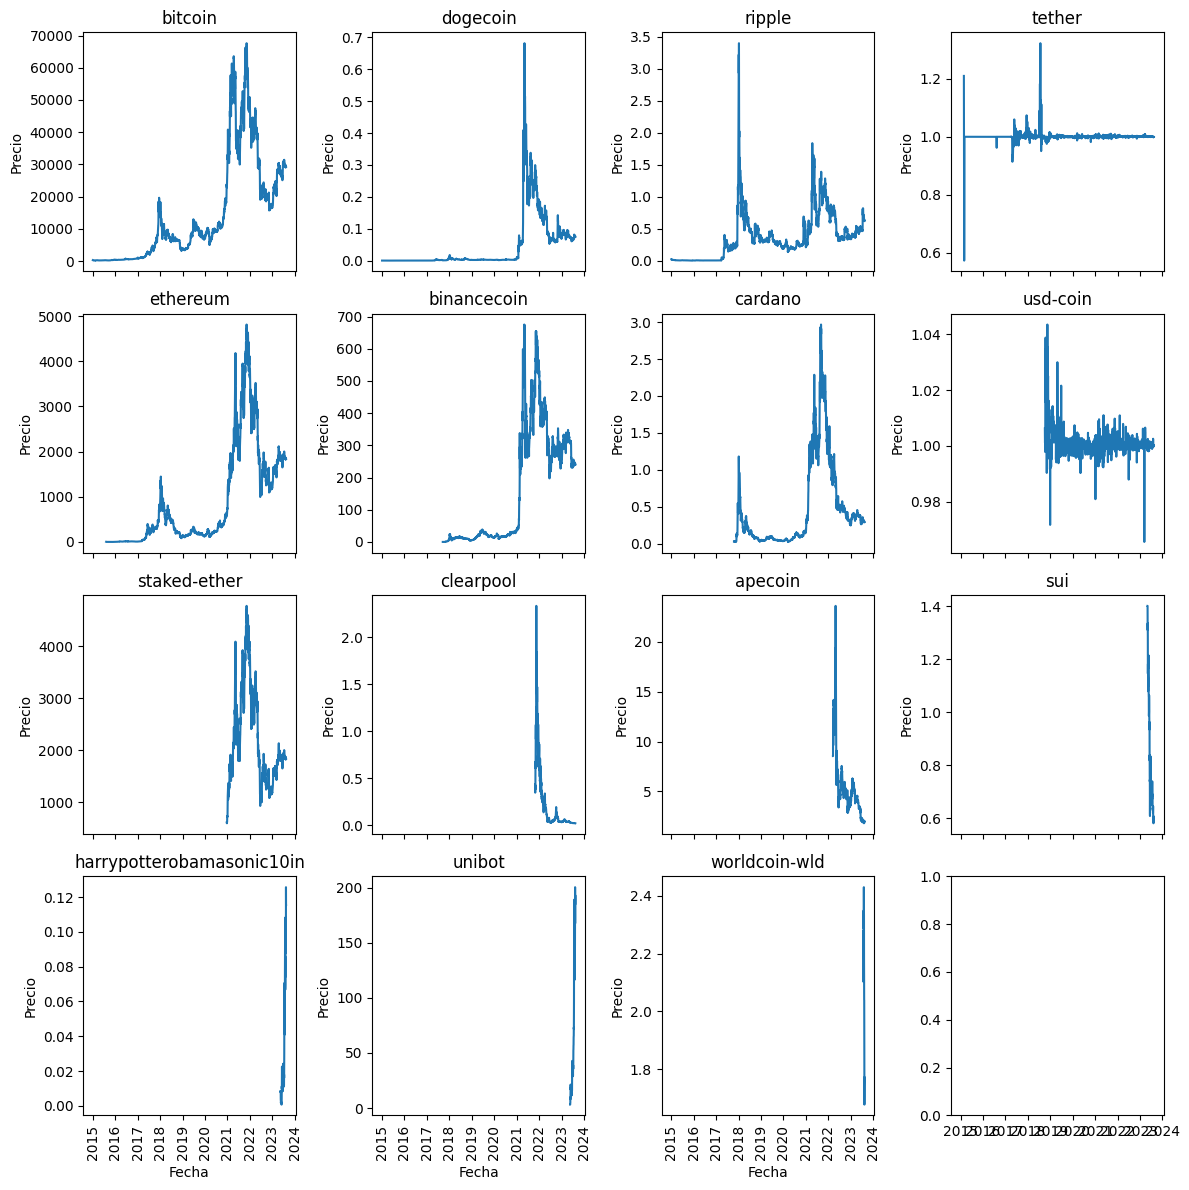

In [413]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12),sharex=True)  # Cambia nrows y ncols según el número de categorías únicas
# Iterar sobre las categorías únicas y crear un gráfico para cada una
plt.subplots_adjust(hspace=0.7)

criptos_unicas = dffinal['Cripto'].unique()
for i, cripto in enumerate(criptos_unicas):
    row = i // 4
    col = i % 4
    ax = axes[row, col]  # Seleccionar el eje correspondiente
    sns.lineplot(x='Fecha', y='Precio', data=dffinal[dffinal['Cripto'] == cripto], ax=ax)
    ax.set_title(f'{cripto}')
    if row != 3:
        plt.setp(ax.get_xticklabels(), visible=False)
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila


# Ajustar el diseño de los subplots
plt.tight_layout()


Primeras conclusiones:  
-Si bien estamos analizando informacióndesde el 2015, hay varias de las criptomonedas que son más recientes por lo que tenemos menos información. Sobre todo varias de las que son "tendencia"
-Entre las 16 criptomonedas, estamos analizando 2 stablecoins (tipo de criptomoneda diseñada para mantener un valor estable en relación con una referencia,por ejemplo, el dólar estadounidense). Son el usd-coin y tether
-Se aprecia en primer medida una gran volatilidad en todos los casos, con un gran pico entre el 2021 y 2022

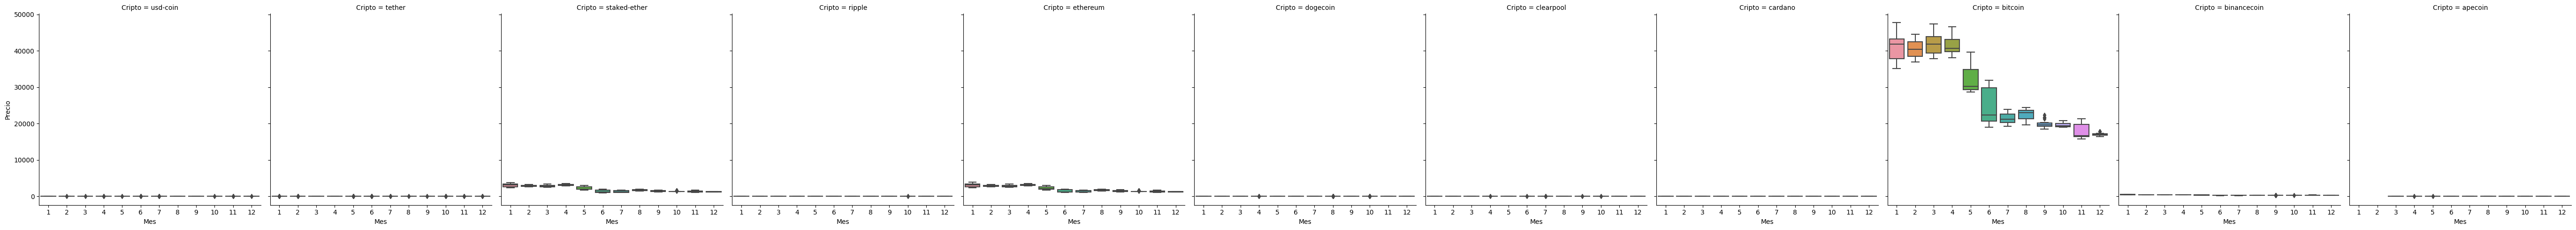

In [414]:
sns.catplot(data=dffinal[dffinal['Año']==2022],y='Precio',x='Mes',col = 'Cripto',kind = 'box')

A continuación, vamos a realizar un análisis de los precios de mercado en un período más corto de tiempo para entender mejor como se comportan. Veremos tendencias en el año 2023 por:  
-Lo que va del año
-Mes de referencia/ejemplo 
-Día de la semana

C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\2997909094.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila
C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\2997909094.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila
C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\2997909094.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila


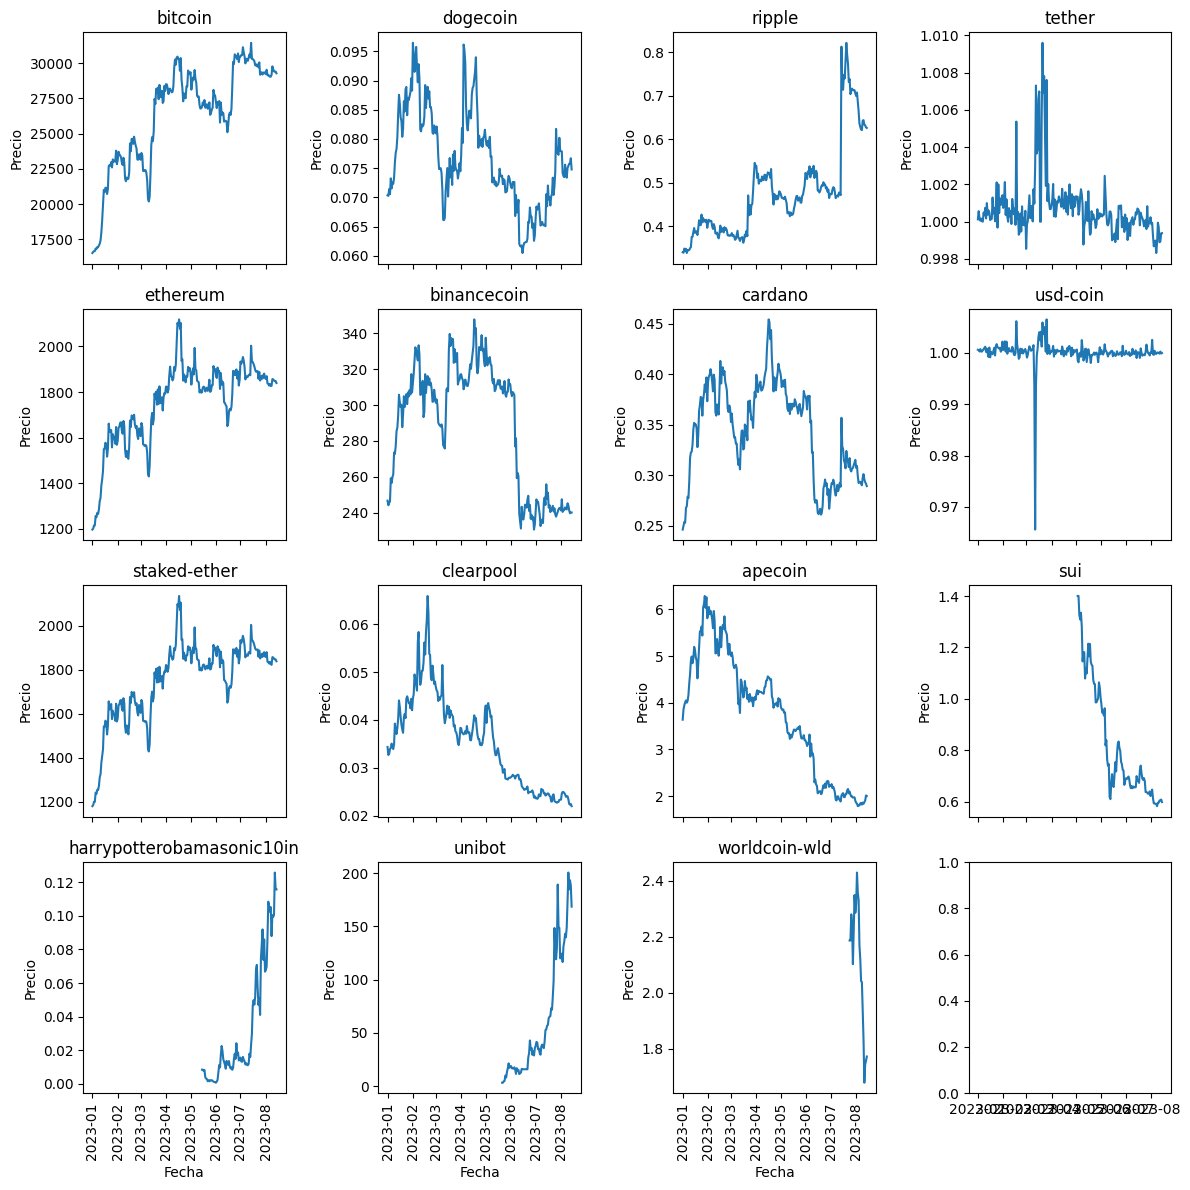

In [415]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12),sharex=True)  # Cambia nrows y ncols según el número de categorías únicas
# Iterar sobre las categorías únicas y crear un gráfico para cada una
plt.subplots_adjust(hspace=0.7)

criptos_unicas = dffinal['Cripto'].unique()
for i, cripto in enumerate(criptos_unicas):
    row = i // 4
    col = i % 4
    ax = axes[row, col]  # Seleccionar el eje correspondiente
    sns.lineplot(x='Fecha', y='Precio', data=dffinal[(dffinal['Cripto'] == cripto)&(dffinal['Año'] == 2023)], ax=ax)
    ax.set_title(f'{cripto}')
    if row != 3:
        plt.setp(ax.get_xticklabels(), visible=False)
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila


# Ajustar el diseño de los subplots
plt.tight_layout()

Analizand en horizontes de tiempo más cortos, vemos que no todas las monedas tienen la misma variabilidad. Si bien hay picos muy marcados que repercuten en la mayoría de las monedas, vemos que la mayoría de las monedas tienen patrones no necesariamente iguales al resto de las monedas.  
Si vemos una marcada similitud entre Bitcoin y Ethereum.

C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\4170923699.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila
C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\4170923699.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila
C:\Users\Mariano\AppData\Local\Temp\ipykernel_3432\4170923699.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila


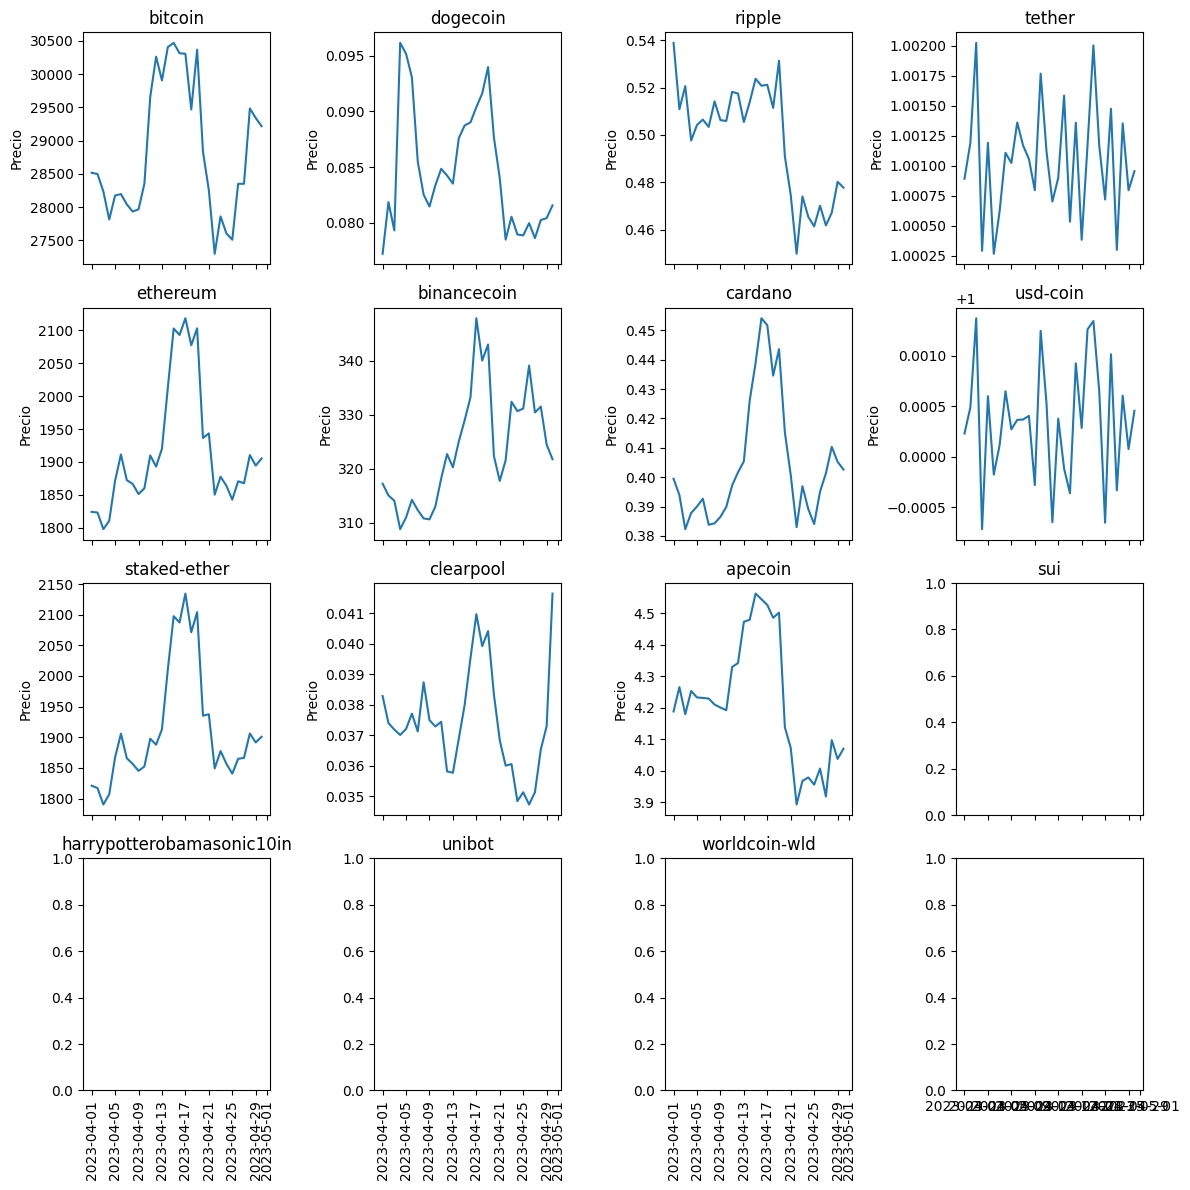

In [416]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12),sharex=True)  # Cambia nrows y ncols según el número de categorías únicas
# Iterar sobre las categorías únicas y crear un gráfico para cada una
plt.subplots_adjust(hspace=0.7)

criptos_unicas = dffinal['Cripto'].unique()
for i, cripto in enumerate(criptos_unicas):
    row = i // 4
    col = i % 4
    ax = axes[row, col]  # Seleccionar el eje correspondiente
    sns.lineplot(x='Fecha', y='Precio', data=dffinal[(dffinal['Cripto'] == cripto)&(dffinal['Año'] == 2023)&(dffinal['Mes'] == 4)], ax=ax)
    ax.set_title(f'{cripto}')
    if row != 3:
        plt.setp(ax.get_xticklabels(), visible=False)
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila


# Ajustar el diseño de los subplots
plt.tight_layout()

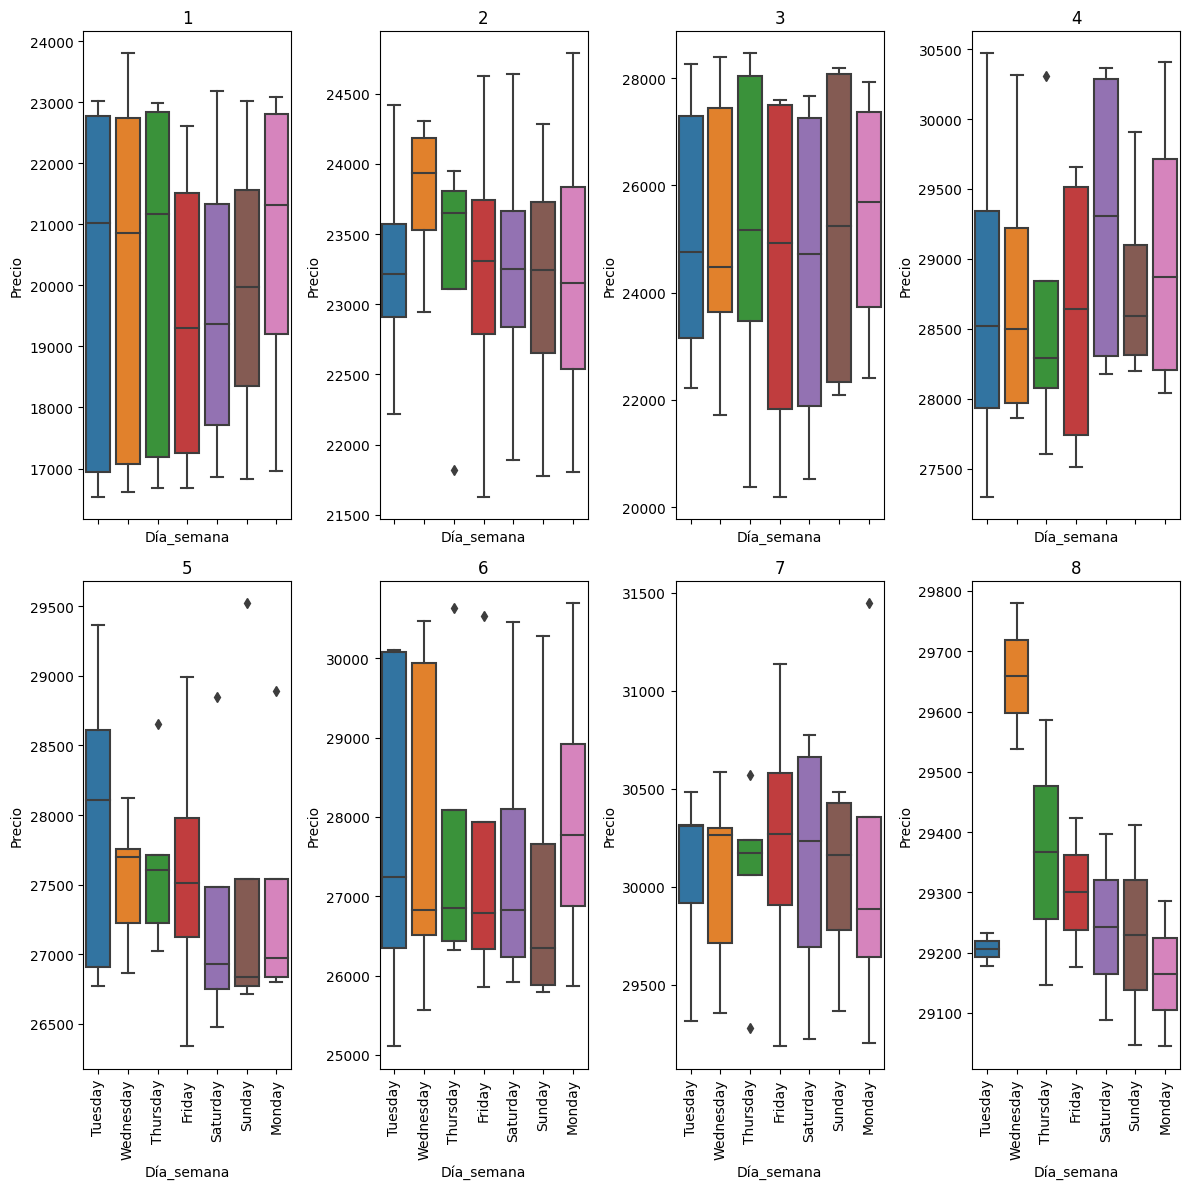

In [417]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 12),sharex=True)  # Cambia nrows y ncols según el número de categorías únicas
# Iterar sobre las categorías únicas y crear un gráfico para cada una
plt.subplots_adjust(hspace=0.7)

meses = dffinal['Mes'][(dffinal['Año'] == 2023)].unique()
for i, mes in enumerate(meses):
    row = i // 4
    col = i % 4
    ax = axes[row, col]  # Seleccionar el eje correspondiente
    sns.boxplot(x='Día_semana', y='Precio', data=dffinal[(dffinal['Mes'] == mes)&(dffinal['Año'] == 2023)&(dffinal['Cripto'] == 'bitcoin')], ax=ax)
    ax.set_title(f'{mes}')
    if row != 1:
        plt.setp(ax.get_xticklabels(), visible=False)
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Girar las etiquetas en el último subplot de cada fila


# Ajustar el diseño de los subplots
plt.tight_layout()

Analizando el comportamiento por día de semana del bitcoin para todos los meses del 2023, no vemos ninguna tendencia lo suficientemente marcada como para sugerir en base a esto

### Análisis por Halvings
Un halving de bitcoin (en ocasiones llamado «halvening») se da cuando el beneficio por minar nuevos bloques se reduce a la mitad, lo que implica que los mineros reciben un 50% menos bitcoins por verificar las transacciones. Los halvings de bitcoin tienen lugar cada 210 000 bloques (aproximadamente cada cuatro años), y se producirán hasta que la red haya generado una oferta máxima de 21 millones de bitcoins.  
Evento	Fecha	Número de bloque	Recompensa por bloque	Total de bitcoins nuevos entre eventos  
Lanzamiento de bitcoin	3 enero 2009	0 (bloque génesis)	50 nuevos BTC	10 500 000 BTC  
Primer halving	28 noviembre 2012	210 000	25 nuevos BTC	5 250 000 BTC  
Segundo halving	9 julio 2016	420 000	12,5 nuevos BTC	2 625 000 BTC  
Tercer halving	11 mayo 2020	630 000	6,25 nuevos BTC	1 312 500 BTC  
Cuarto halving	Se espera para el año 2024	840 000	3,125 nuevos BTC	656 250 BTC  
Quinto halving	Se espera para el año 2028	1 050 000	1,5625 nuevos BTC	328 125 BTC  

<Axes: xlabel='Fecha', ylabel='Precio'>

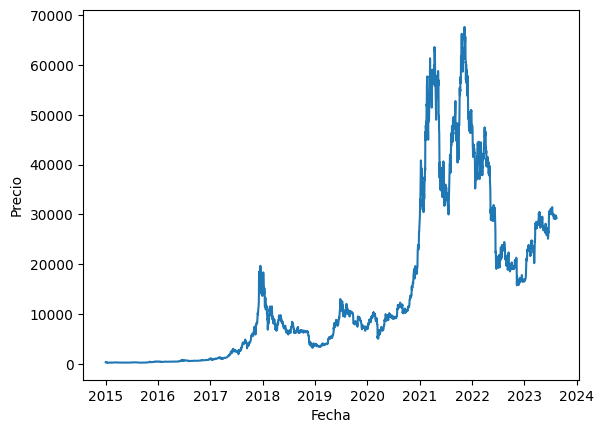

In [418]:
sns.lineplot(x='Fecha', y='Precio', data=dffinal[(dffinal['Cripto']=='bitcoin')])

<Axes: xlabel='Fecha', ylabel='Precio'>

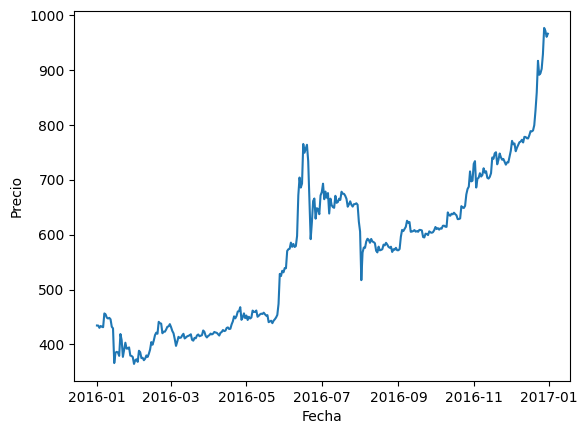

In [419]:
sns.lineplot(x='Fecha', y='Precio', data=dffinal[(dffinal['Cripto']=='bitcoin')&(dffinal['Año']==2016)])

<Axes: xlabel='Fecha', ylabel='Precio'>

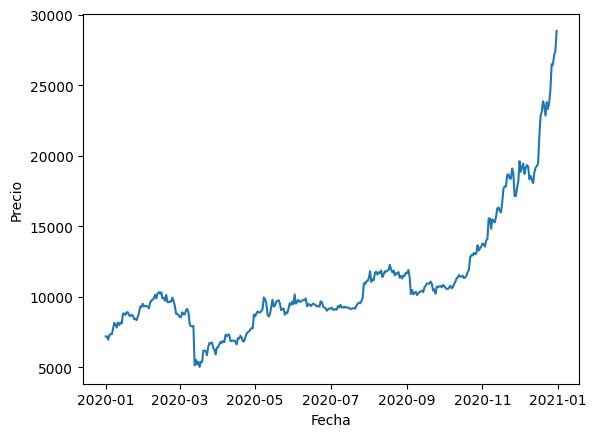

In [420]:
sns.lineplot(x='Fecha', y='Precio', data=dffinal[(dffinal['Cripto']=='bitcoin')&(dffinal['Año']==2020)])

Si bien la tenemos pocos halvings para analizar, vemos que durante el año, o al año siguiente de haber un halving suelen existir crecimientos exponenciales en los precios del bitcoin.

Nuestro análisis sobre el halving de bitcoin de 2020
Por Josh Mahony  
El 11 de mayo de 2020 tuvo lugar un halving de bitcoin y, en consecuencia, la recompensa para los mineros es un 50% menor. Esta restricción de la oferta debería llevar al activo a un escenario alcista a lo largo del tiempo. Si repasamos los eventos de halving anteriores, podemos ver que entre los 12 y 18 meses anteriores y posteriores a cada evento, la criptomoneda ha obtenido ganancias sustanciales.  

Esta ocasión no ha resultado ser diferente, debido al aumento del 181% que hemos visto desde el mínimo de 3126 dólares que se alcanzó en diciembre de 2018. Si miramos la evolución del precio durante los 17 meses anteriores al halving el aumento puede parecer decepcionante, lo que puede atribuirse a varias razones. En primer lugar, la naturaleza logarítmica del gráfico hace que las comparaciones históricas resulten difíciles. La subida de 5639 dólares que se observa en la fase previa al halving eclipsa por completo a las subidas de 463,00 dólares (2015/16) y de 10,58 dólares (2012) que se vieron en los dos últimos periodos de este tipo.  

Desde una perspectiva porcentual, la subida es indudablemente menor que en aquellas dos ocasiones, ya que el aumento del 180% se coloca por debajo de los aumentos del 277% y del 531% vistos con anterioridad. No obstante, se espera que la subida que veamos en cada fase se normalice a medida que aumenta el precio de bitcoin.  

Desde una perspectiva histórica, el periodo de aumento más fuerte se ha producido después del halving, ya que las dos ocasiones anteriores han provocado unas enormes subidas del 3031% (2017) y del 9780% (2013), lo que apunta a otro periodo potencial de subidas sustanciales entre los 12 y 17 meses posteriores al evento de mayo de 2020. Sin embargo, las expectativas de un aumento que se acerque a los niveles que oscilan entre el 3031% y el 9780% que se han visto anteriormente parecen un poco exageradas.

### Principales factores externos que han influido en el precio del bitcoin

<Axes: xlabel='Fecha', ylabel='Precio'>

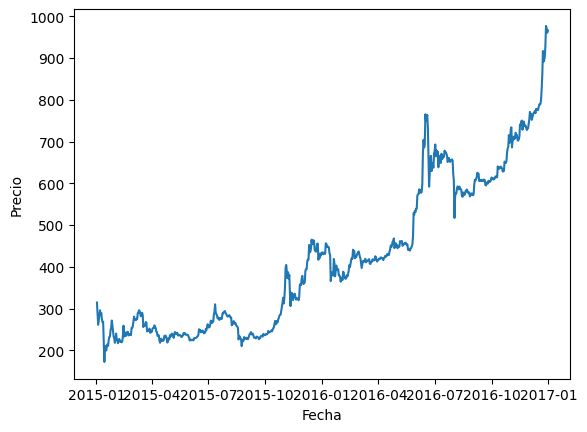

In [421]:
sns.lineplot(x='Fecha', y='Precio', data=dffinal[(dffinal['Cripto']=='bitcoin')&(dffinal['Año']<2017)])